In [57]:
import matplotlib.pyplot as plt
import numpy as np

from algorithms import pso
from problems import rosenbrock, rosen_boundaries
from utils import repeat

from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
from pymoo.termination import get_termination

class SavePopulationCallback(Callback):
    def __init__(self):
        super().__init__()
        self.data = []

    def notify(self, algorithm):
        # append the deep copy of current population to data list
        best_idx = np.argmin(algorithm.pop.get("F"))
        best_x = np.float32(algorithm.pop.get("X")[best_idx])
        best_f = np.float32(algorithm.pop.get("F")[best_idx])
        self.data.append((best_x, best_f))



problem = get_problem("rosenbrock", n_var=2)

pymoo_pso = PSO()

In [23]:
c1s = np.linspace(0, 1, 5)
c2s = np.linspace(0, 1, 5)
ws = np.linspace(0, 2, 5)
n_particles = 30
repetition = 30

experiments = {}
for c1 in c1s:
    experiments[c1] = {}
    for c2 in c2s:
        experiments[c1][c2] = {}
        for w in ws:
            if c1 + c2 == 0:
                continue
            print(f"Running experiment with c1={c1}, c2={c2}, w={w}")
            results = repeat(repetition, pso, rosenbrock, rosen_boundaries(2), n_particles, w, c1, c2, 30)
            experiments[c1][c2][w] = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

Running experiment with c1=0.0, c2=0.25, w=0.0
Running experiment with c1=0.0, c2=0.25, w=0.5
Running experiment with c1=0.0, c2=0.25, w=1.0
Running experiment with c1=0.0, c2=0.25, w=1.5
Running experiment with c1=0.0, c2=0.25, w=2.0
Running experiment with c1=0.0, c2=0.5, w=0.0
Running experiment with c1=0.0, c2=0.5, w=0.5
Running experiment with c1=0.0, c2=0.5, w=1.0
Running experiment with c1=0.0, c2=0.5, w=1.5
Running experiment with c1=0.0, c2=0.5, w=2.0
Running experiment with c1=0.0, c2=0.75, w=0.0
Running experiment with c1=0.0, c2=0.75, w=0.5
Running experiment with c1=0.0, c2=0.75, w=1.0
Running experiment with c1=0.0, c2=0.75, w=1.5
Running experiment with c1=0.0, c2=0.75, w=2.0
Running experiment with c1=0.0, c2=1.0, w=0.0
Running experiment with c1=0.0, c2=1.0, w=0.5
Running experiment with c1=0.0, c2=1.0, w=1.0
Running experiment with c1=0.0, c2=1.0, w=1.5
Running experiment with c1=0.0, c2=1.0, w=2.0
Running experiment with c1=0.25, c2=0.0, w=0.0
Running experiment with

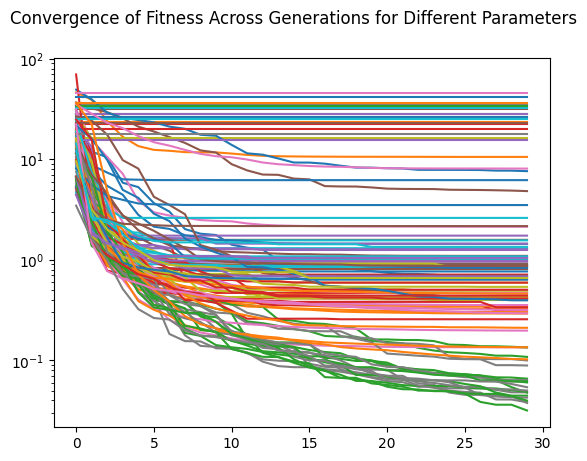

In [29]:
for c1 in c1s:
    for c2 in c2s:
        for w in ws:
            if c1 + c2 == 0:
                continue
            plt.plot(experiments[c1][c2][w]['fitness'].mean(axis=0), label=f"c1={c1}, c2={c2}, w={w}")

plt.suptitle("Convergence of Fitness Across Generations for Different Parameters")

plt.yscale("log")
plt.show()

In [33]:
# choose 5 best curves of experiments
mins = np.zeros(5) + float("inf")
bests = np.zeros(5, dtype=[('c1', float), ('c2', float), ('w', float)])
for c1 in c1s:
    for c2 in c2s:
        for w in ws:
            if c1 + c2 == 0:
                continue
            mean = experiments[c1][c2][w]['fitness'].mean(axis=0)[-1]
            idx = np.argmax(mins)
            if mean < mins[idx]:
                mins[idx] = mean
                bests[idx] = (c1, c2, w)

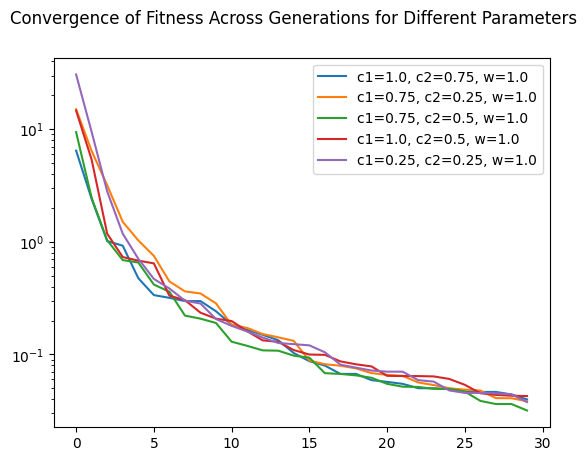

In [34]:
for c1, c2, w in bests:
    plt.plot(experiments[c1][c2][w]['fitness'].mean(axis=0), label=f"c1={c1}, c2={c2}, w={w}")

plt.suptitle("Convergence of Fitness Across Generations for Different Parameters")

plt.legend()
plt.yscale("log")
plt.show()

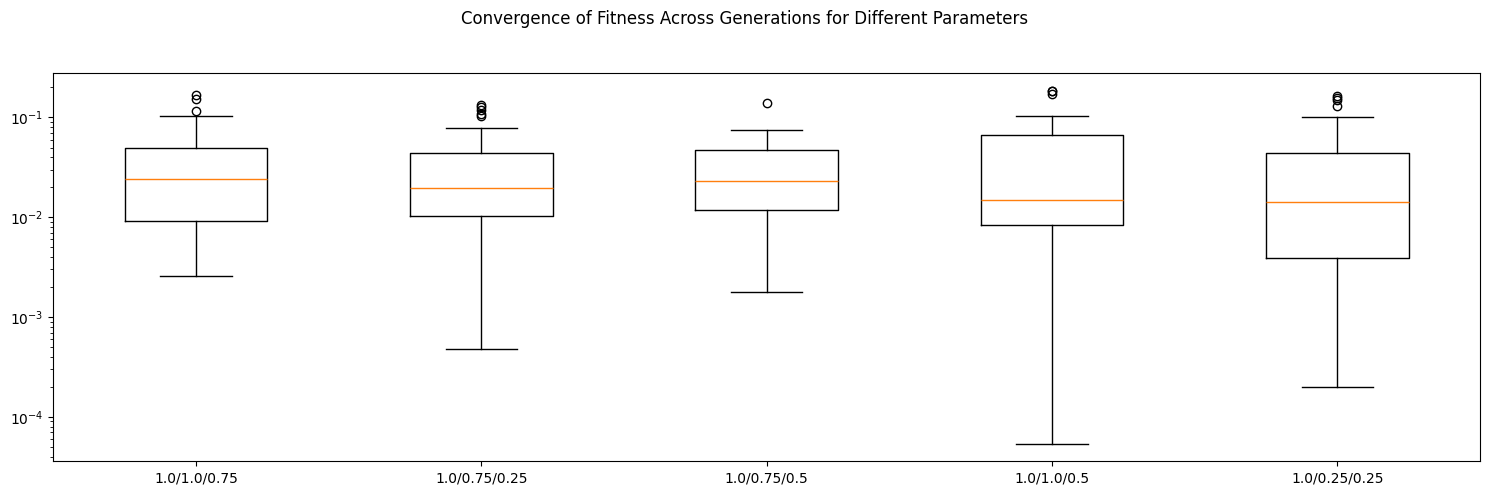

In [35]:
fig = plt.figure(figsize=(15, 5))

data = [experiments[c1][c2][w]["fitness"][:, -1] for c1, c2, w in bests]
plt.boxplot(data, labels=[f"{w}/{c1}/{c2}" for c1, c2, w in bests])
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Parameters")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

In [49]:
iterations = 30
repetition = 30
n_particles = np.linspace(30, 100, 5, dtype=int)
w = 1.0
c1 = 0.8
c2 = 0.8

particles_experiments = {}
for n in n_particles:
    print(f"Running experiment with {n} particles")
    results = repeat(repetition, pso, rosenbrock, rosen_boundaries(2), n, w, c1, c2, iterations)
    particles_experiments[n] = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])

Running experiment with 30 particles
Running experiment with 47 particles
Running experiment with 65 particles
Running experiment with 82 particles
Running experiment with 100 particles


In [51]:
termination = get_termination("n_gen", 30)
repetitions = 30

pymoo_exp = []
for _ in range(repetitions):
    callback = SavePopulationCallback()
    minimize(problem, pymoo_pso, termination, callback=callback)
    pymoo_exp.append(callback.data)
pymoo_exp = np.array(pymoo_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])

/var/folders/qk/qhpk8_352d1gw4g1s3r0mlrm0000gn/T/ipykernel_45073/2905485.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pymoo_exp = np.array(pymoo_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])


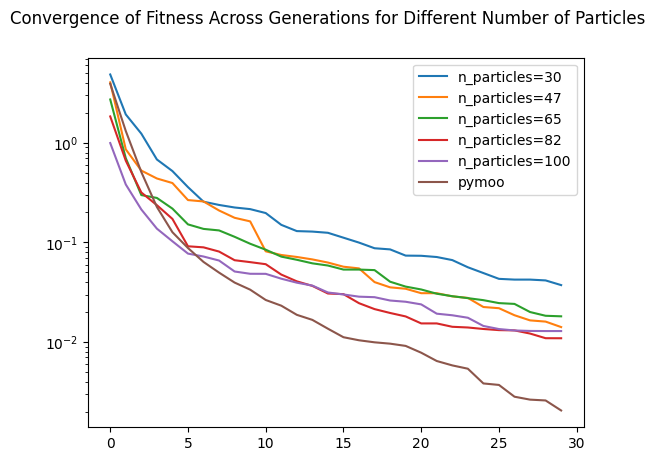

In [52]:
for n in n_particles:
    plt.plot(particles_experiments[n]['fitness'].mean(axis=0), label=f"n_particles={n}")

plt.plot(pymoo_exp["fitness"].mean(axis=0), label="pymoo")
plt.suptitle("Convergence of Fitness Across Generations for Different Number of Particles")

plt.legend()
plt.yscale("log")
plt.show()

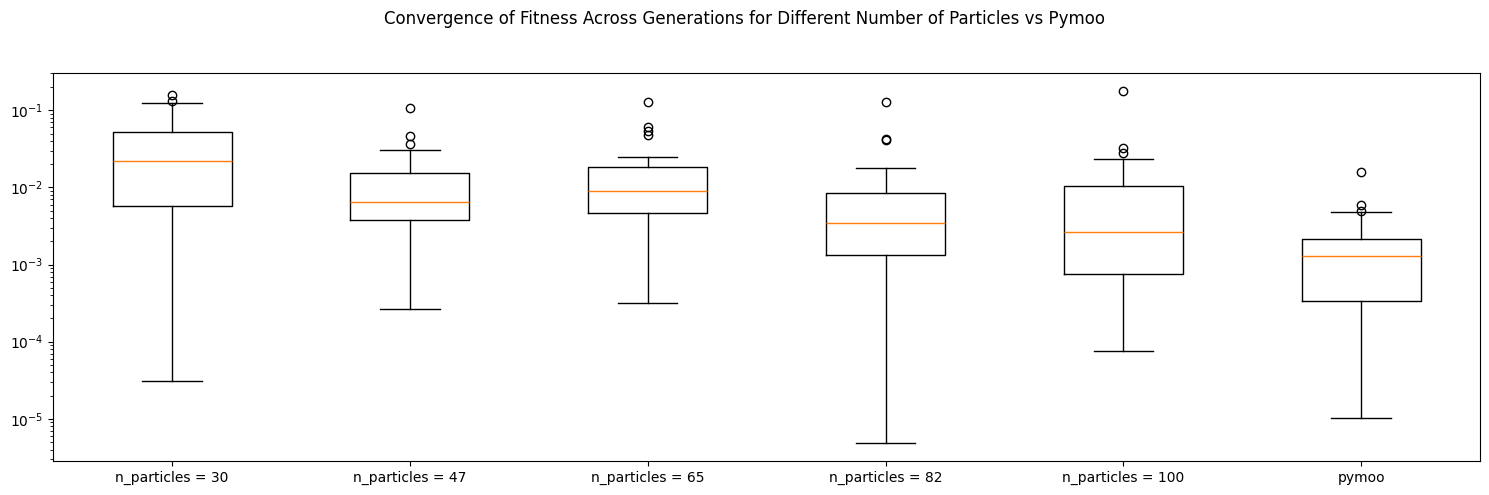

In [53]:
fig = plt.figure(figsize=(15, 5))

data = [particles_experiments[n]["fitness"][:, -1] for n in n_particles] + [pymoo_exp["fitness"][:, -1]]
labels = [f"n_particles = {n}" for n in n_particles] + ["pymoo"]
plt.boxplot(data, labels=labels)
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Number of Particles vs Pymoo")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

In [58]:
from algorithms import de
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.operators.sampling.lhs import LHS

In [60]:
fmap = {"best": de.mutation.best}

N = 30
F = 0.8
Cr = 0.8
NP = 100


results = repeat(30, de.minimize, rosenbrock, rosen_boundaries(2), NP, F, Cr, x=fmap["best"], y=2)
de_experiments = np.array([list(result) for result in results], dtype=[('best_x', float, (2,)), ('fitness', float)])


In [62]:
pymoo_de = DE(
    pop_size=100,
    sampling=LHS(),
    variant=f"DE/best/2/bin",
    CR=0.8,
    dither="vector",
    jitter=False
)

termination = get_termination("n_gen", 100)


pymoo_de_exp = []
for i in range(30):
    callback = SavePopulationCallback()
    res = minimize(problem,
                pymoo_de,
                termination=termination,
                seed=np.random.randint(0, 10000),
                callback=callback)
    pymoo_de_exp.append(callback.data)
    
pymoo_de_exp = np.array(pymoo_de_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])

/var/folders/qk/qhpk8_352d1gw4g1s3r0mlrm0000gn/T/ipykernel_45073/2610678354.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pymoo_de_exp = np.array(pymoo_de_exp, dtype=[('best_x', float, (2,)), ('fitness', float)])


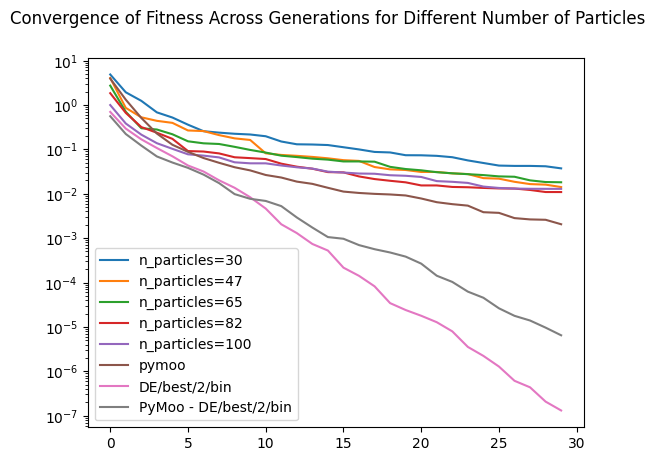

In [65]:
for n in n_particles:
    plt.plot(particles_experiments[n]['fitness'].mean(axis=0), label=f"n_particles={n}")

plt.plot(pymoo_exp["fitness"].mean(axis=0), label="pymoo")
plt.plot(de_experiments['fitness'].mean(axis=0)[:30], label="DE/best/2/bin")
plt.plot(pymoo_de_exp["fitness"].mean(axis=0)[:30], label="PyMoo - DE/best/2/bin")

plt.suptitle("Convergence of Fitness Across Generations for Different Number of Particles")

plt.legend()
plt.yscale("log")
plt.show()

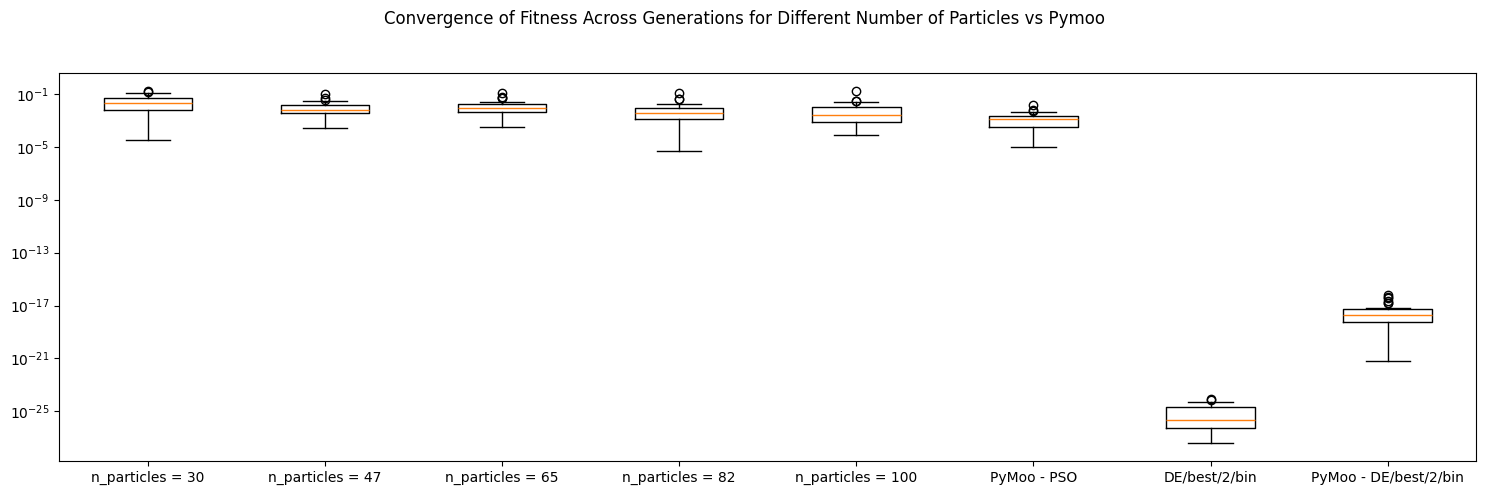

In [66]:
fig = plt.figure(figsize=(15, 5))

data = [particles_experiments[n]["fitness"][:, -1] for n in n_particles] + [pymoo_exp["fitness"][:, -1]] + [de_experiments["fitness"][:, -1]] + [pymoo_de_exp["fitness"][:, -1]]
labels = [f"n_particles = {n}" for n in n_particles] + ["PyMoo - PSO", "DE/best/2/bin", "PyMoo - DE/best/2/bin"]
plt.boxplot(data, labels=labels)
plt.yscale('log')

fig.suptitle("Convergence of Fitness Across Generations for Different Number of Particles vs Pymoo")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()